# Part 1

In [1]:
import pandas as pd
import numpy as num


In [2]:
def normalize(data,list_attribute,thershold):
    norm = (data - data.mean())/data.std()
#     norm['Chance of Admit '] = data['Chance of Admit ']
    li=[]
    for i in data['Chance of Admit ']:
#         print i
        if i >= thershold :
#             print 1
            li.append(1)
        else:
#             print 0
            li.append(0)
    norm['Chance of Admit ']=li
    return norm

In [3]:
data= pd.read_csv('AdmissionDataset/data.csv')
data=data.drop(columns='Serial No.')
list_attribute= data.columns[:-1]
# print list_attribute
data=normalize(data,list_attribute,0.5)
li=[1]*len(data.index)
data.insert(0, "Extra", li) 
train_data=data.sample(frac=0.8)
validation_data=data.drop(train_data.index)


In [4]:
# train_data

In [5]:
# validation_data

In [6]:
def sigmod_function(a):
    return 1/(1+num.exp(-a))

In [7]:
def gradiant_method_mean_sq_error(X,Y,beta,learning_rate,m):
#     print X.shape
    a=num.dot(X,beta)
#     print Y.shape
    a=sigmod_function(a)
    z=num.subtract(a,Y)
#     print z.shape
    a=(learning_rate/m)*(num.dot(z.T,X))
#     print a.shape
    beta=num.subtract(beta,a.T)
#     print beta.shape
    return beta

In [8]:
def calc_predication(beta,test_data):
#     print test_data.iloc[:,:-1].values.shape
#     print beta.shape
    predication=sigmod_function(num.dot(test_data.iloc[:,:-1].values,beta))
    return predication

In [9]:
def value_transformation(predication,thershold):
    li=[]
    for i in predication:
        if i[0]>=thershold:
            li.append(1)
        else:
            li.append(0)
    return li

In [10]:
def calc_preformance(target_value,pridected_value):
    t_p=0
    f_p=0
    t_n=0
    f_n=0
    for i in range(len(target_value)):
        if target_value[i]==0 and target_value[i]==pridected_value[i]:
            t_n=t_n+1
        elif target_value[i]==1 and target_value[i]==pridected_value[i]:
            t_p=t_p+1
        elif pridected_value[i]==1 and target_value[i]==0:
            f_p=f_p+1
        elif pridected_value[i]==0 and target_value[i]==1:
            f_n=f_n+1
    if t_p!=0:
        accuracy=(t_n+t_p)/float(t_n+t_p+f_p+f_n)

        precision=(t_p)/float(t_p+f_p)
        recall=(t_p)/float(t_p+f_n)
        a=1/precision
        b=1/recall
        f1_score=2/(a+b)
    else :
        accuracy=0
        precision=0
        recall=0
        f1_score=0
#     print "ture positive",t_p
#     print "false positive",f_p
#     print "false negative",f_n
#     print "ture negative",t_n
    
    print "Accuracy ",accuracy
    print "Precision ",precision
    print "Recall ",recall
    print "F1 Score",f1_score
    return accuracy,precision,recall


In [11]:
beta=num.array([0]*8)
X=train_data.iloc[:,:-1].values
Y=num.array(train_data['Chance of Admit '].tolist())
beta=beta.reshape(8,1)
Y=Y.reshape(360,1)
m=len(train_data.index)
for i in range(10000):
    beta=gradiant_method_mean_sq_error(X,Y,beta,0.1,m)
# print beta
predication=calc_predication(beta,validation_data)
# print predication,beta
predication=value_transformation(predication,0.5)
print predication
# print "Accuracy :"+ str(accuracy_score(validation_data['Chance of Admit '].tolist(),predication))
# print "F1_Score :"+ str(f1_score(validation_data['Chance of Admit '].tolist(),predication))
accurary=calc_preformance(validation_data['Chance of Admit '].tolist(),predication)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Accuracy  0.933333333333
Precision  0.929411764706
Recall  1.0
F1 Score 0.963414634146


# Part 2

In [12]:
def check_value(validation_data ,list_attributes,train_data,k_value,type_cal,output_label):
    dict_value={}
    list_value=[]
    validation_prediction=[]
    for validate_index, validate_row in validation_data.iterrows():
        dict_value={}
        dict_result={}
        for train_index, train_row in train_data.iterrows():
            if type_cal==0:
#                 euclidean
                sum_value=0.0
                for attr in list_attributes:
                    sum_value=sum_value + ((validate_row[attr]-train_row[attr])**2)
                sum_value=(sum_value**0.5)
            elif type_cal==1:
#                 Manhatan
                sum_value=0.0
                for attr in list_attributes:
                    sum_value=sum_value + abs(validate_row[attr]-train_row[attr])
                
            elif type_cal==2:
#                 Minkowski
                sum_value=0.0
                for attr in list_attributes:
                    sum_value=sum_value + (abs(validate_row[attr]-train_row[attr])**1.5)
                sum_value=math.pow(sum_value,1/1.5)
            elif type_cal==3:
#                 cosine 
                sum_value=0.0
                x_y=0.0
                x_2=0.0
                y_2=0.0
                for attr in list_attributes:
                    x_y = x_y + (validate_row[attr]*train_row[attr])
                    x_2 = x_2 + (train_row[attr]**2)
                    y_2 = y_2 + (validate_row[attr]**2)
                    
                x_2=(x_2**0.5)
                y_2=(y_2**0.5)
                sum_value=1-(x_y/(x_2*y_2))
            dict_value.setdefault(sum_value,[])
            dict_value[sum_value].append(train_index)
            dict_result.setdefault(sum_value,[])
            dict_result[sum_value].append(train_row[output_label])
#         print dict_value
#         print dict_result
        current_k=0
        res={}
#         print(train_data['class'].unique())
        for key in train_data[output_label].unique():
            res[key]=0
        l=dict_result.keys()
        l.sort()
        for key in l:
            if current_k<k_value:
                for i in dict_result[key]:
                    if current_k<k_value:
                        for j in res.keys():
                            if j==i:
                                res[j]=res[j]+1
                                current_k=current_k+1
                    else:
                        break
            else :
                break
        max_v=0
        predication=0
#         print(res.keys())
        for key in res.keys():
            if res[key]>max_v:
                predication=key
                max_v=res[key]
    
        validation_prediction.append(predication)
    return validation_prediction        

In [13]:
ac_list_robot=[]
max_value_k=int((len(train_data.index)**0.5))
output_label='Chance of Admit '
actual_value=validation_data['Chance of Admit '].tolist()
list_attributes=data.columns[1:-1]
dict_ac={0:[],1:[],2:[],3:[]}
for i in range(1,max_value_k+1,2):
    print "k-value : "+str(i)
    prediction=check_value(validation_data.iloc[:,1:],list_attributes,train_data.iloc[:,1:],i,0,output_label)
    ac=calc_preformance(actual_value,prediction)

k-value : 1
Accuracy  0.9
Precision  0.926829268293
Recall  0.962025316456
F1 Score 0.944099378882
k-value : 3
Accuracy  0.922222222222
Precision  0.928571428571
Recall  0.987341772152
F1 Score 0.957055214724
k-value : 5
Accuracy  0.911111111111
Precision  0.908045977011
Recall  1.0
F1 Score 0.951807228916
k-value : 7
Accuracy  0.933333333333
Precision  0.929411764706
Recall  1.0
F1 Score 0.963414634146
k-value : 9
Accuracy  0.922222222222
Precision  0.918604651163
Recall  1.0
F1 Score 0.957575757576
k-value : 11
Accuracy  0.911111111111
Precision  0.908045977011
Recall  1.0
F1 Score 0.951807228916
k-value : 13
Accuracy  0.9
Precision  0.897727272727
Recall  1.0
F1 Score 0.946107784431
k-value : 15
Accuracy  0.888888888889
Precision  0.887640449438
Recall  1.0
F1 Score 0.940476190476
k-value : 17
Accuracy  0.877777777778
Precision  0.877777777778
Recall  1.0
F1 Score 0.934911242604


# Part 3

In [17]:
list_threshold=[]
list_precision=[]
list_recall=[]
end=10
for i in range(1,end):
    print "Thershold : "+str(i/float(end))
    data= pd.read_csv('AdmissionDataset/data.csv')
    data=data.drop(columns='Serial No.')
    list_attribute= data.columns[:-1]
    data=normalize(data,list_attribute,i/float(end))
    li=[1]*len(data.index)
    data.insert(0, "Extra", li) 
    train_data=data.sample(frac=0.8,random_state=200)
    validation_data=data.drop(train_data.index)
    beta=num.array([0]*8)
    X=train_data.iloc[:,:-1].values
    Y=num.array(train_data['Chance of Admit '].tolist())
    beta=beta.reshape(8,1)
    Y=Y.reshape(360,1)
    m=len(train_data.index)
    for j in range(10000):
        beta=gradiant_method_mean_sq_error(X,Y,beta,0.1,m)
    predication=calc_predication(beta,validation_data)
    predication=value_transformation(predication,i/10.0)
    accurary,precision,recall=calc_preformance(validation_data['Chance of Admit '].tolist(),predication)
#     print accurary
    list_precision.append(precision)
    list_recall.append(recall)
    list_threshold.append(i/float(end))

Thershold : 0.1
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Thershold : 0.2
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Thershold : 0.3
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Thershold : 0.4
Accuracy  1.0
Precision  1.0
Recall  1.0
F1 Score 1.0
Thershold : 0.5
Accuracy  0.988888888889
Precision  0.988505747126
Recall  1.0
F1 Score 0.994219653179
Thershold : 0.6
Accuracy  0.866666666667
Precision  0.932432432432
Recall  0.907894736842
F1 Score 0.92
Thershold : 0.7
Accuracy  0.833333333333
Precision  0.933333333333
Recall  0.777777777778
F1 Score 0.848484848485
Thershold : 0.8
Accuracy  0.933333333333
Precision  0.954545454545
Recall  0.807692307692
F1 Score 0.875
Thershold : 0.9
Accuracy  0.933333333333
Precision  1.0
Recall  0.5
F1 Score 0.666666666667


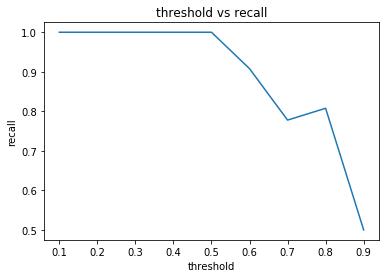

In [18]:
import matplotlib.pyplot as plt
plt.plot(list_threshold,list_recall)
plt.title('threshold vs recall')
plt.xlabel('threshold')
plt.ylabel('recall')
plt.show()

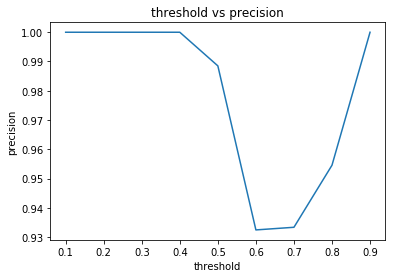

In [19]:
import matplotlib.pyplot as plt
plt.plot(list_threshold,list_precision)
plt.title('threshold vs precision')
plt.xlabel('threshold')
plt.ylabel('precision')
plt.show()